# Анализ бизнес-показателей развлекательного приложения

В данном проекте необходимо разобраться в причинах убыточности рекламной компании развлекательного приложения за последние месяцы работы и помочь выйти в плюс.

**Цель работы:**
Провести анализ бизнес-показателей приложения и выяснить:
- какие клиенты пользуются приложением и откуда приходит основной поток пользователей и платящих пользователей приложения;
- какими эти пользователи пользуются устройствами;
- какова пожизненная ценность пользователей, стоимость их привлечения и окупаемость;
- куда расходуются основные средства, выделенные компание в последние месяцы;
- какие факторы мешают более эффективному распределению бюджета и выгодному привлечению пользователей.

**План работы:**
- получить входные данные: три таблицы, содержащие информацию о пользователях, их покупках и расходах на рекламу;
- изучить информацию, представленную в таблицах;
- провести предобработку данных в таблице, проверить дубликаты, пустые значения, соответсвие типов данных;
- провести исследование: построить профили пользователей и выявить:
    - из каких стран пользователей, пользующихся приложением, большинство;
    - какими устройствами пользователи пользуются чаще;
    - из каких источников пользователи пришли в данное приложение;
- провести исследование рекламного бюджета и выявить:
    - на что расходуется большая часть бюджета;
    - стоимость привлечения пользователей из разных источников;
    - окупаемость пользователей, привлеченных из разных источников;
- на основе исследования выявить причины убыточности рекламной компании приложения Procrastinate Pro+
- сделать рекоммендации, как выйти в плюс из убыточной рекламной компании.

### Загрузка данных и подготовка их к анализу

Подключим необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

Считаем данные из файлов и выведем таблицы на экран. При считывании файлов сразу заменим тип данных с датами на необходимый `datetime`.

In [2]:
visits, orders, costs = (
    pd.read_csv('dataset/visits_info_short.csv', \
                parse_dates=['Session Start', 'Session End']),
    pd.read_csv('dataset/orders_info_short.csv', \
               parse_dates=['Event Dt']),
    pd.read_csv('dataset/costs_info_short.csv')
)

display(visits, orders, costs)

User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

             Session Start         Session End  
0      2019-05-01 02:36:01 2019-05-01 02:45:01  
1      2019-05-01 04:46:31 2019-05-01 04:47:35  
2      2019-05-01 14:09:25 2019-05-01 15:32:08  
3      2019-05-01 00:29:59 2019-05-01 00:54:25  
4      2019-05-01 03:33:35 2019-05-01 03:57:40  
...                    ...                 ...  
309896 2019-10-31 13:28:12 2019-10-31 14:39:29  
309897 2019-10-31 22:14:52 2019-10-31 22:39:36  
309898 2019-10-31 01:40:48 2019-10-31 01:41:31  
309899 2019-10-31 07:37:34 2019-10-31 07:37:55  
309900 2019-10-31 14:17:43 2019-10-31 15:17:04  

[309901 rows x 6 columns]

User Id            Event Dt  Revenue
0      188246423999 2019-05-01 23:09:52     4.99
1      174361394180 2019-05-01 12:24:04     4.99
2      529610067795 2019-05-01 11:34:04     4.99
3      319939546352 2019-05-01 15:34:40     4.99
4      366000285810 2019-05-01 13:59:51     4.99
...             ...                 ...      ...
40207  651604369137 2019-10-31 16:19:07     4.99
40208  275341387049 2019-10-31 01:17:17     4.99
40209  374656616484 2019-10-31 06:17:29     4.99
40210  168548862926 2019-10-31 22:46:19     4.99
40211  329994900775 2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**При первичном изучении данных можно заметить:**
- Названия столбцов не соответствуют стилю `snake case`, необходимо будет привести все названия столбцов к нижнему регистру;
- Названия некоторых столбцов разделено пробелом вместо нижнего подчеркивания, это необходимо будет исправить;
- При считывании все столбцы с датами были приведены к нужному типу.  

#### Предобработка данных

Для начала приведем все названия столбцов к нижнему регистру и заменим пробел на нижнее подчеркивание.

In [6]:
#Функция приводит названия колонок к необходимому виду
def snake_case(data):
    data.columns = [x.lower() for x in data.columns]
    data.columns = data.columns.str.replace(' ', '_', regex=True) 

In [7]:
snake_case(visits)
snake_case(orders)
snake_case(costs)
display(visits, orders, costs)

user_id         region   device         channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

             session_start         session_end  
0      2019-05-01 02:36:01 2019-05-01 02:45:01  
1      2019-05-01 04:46:31 2019-05-01 04:47:35  
2      2019-05-01 14:09:25 2019-05-01 15:32:08  
3      2019-05-01 00:29:59 2019-05-01 00:54:25  
4      2019-05-01 03:33:35 2019-05-01 03:57:40  
...                    ...                 ...  
309896 2019-10-31 13:28:12 2019-10-31 14:39:29  
309897 2019-10-31 22:14:52 2019-10-31 22:39:36  
309898 2019-10-31 01:40:48 2019-10-31 01:41:31  
309899 2019-10-31 07:37:34 2019-10-31 07:37:55  
309900 2019-10-31 14:17:43 2019-10-31 15:17:04  

[309901 rows x 6 columns]

user_id            event_dt  revenue
0      188246423999 2019-05-01 23:09:52     4.99
1      174361394180 2019-05-01 12:24:04     4.99
2      529610067795 2019-05-01 11:34:04     4.99
3      319939546352 2019-05-01 15:34:40     4.99
4      366000285810 2019-05-01 13:59:51     4.99
...             ...                 ...      ...
40207  651604369137 2019-10-31 16:19:07     4.99
40208  275341387049 2019-10-31 01:17:17     4.99
40209  374656616484 2019-10-31 06:17:29     4.99
40210  168548862926 2019-10-31 22:46:19     4.99
40211  329994900775 2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

dt         channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

Названия столбцов успешно заменены, поменяем типы данных в столбцах с датой.

In [8]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Проверим данные таблиц на пропуски и дубликаты. 

In [9]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [10]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [11]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

В данных таблицах пропущенных значений нет. Посмотрим, как обстоят дела с дубликатами.


In [12]:
print('Наличие дубликатов: \n\t\t в таблице visits =', visits.duplicated().sum(),
      '\n\t\t в таблице orders =', orders.duplicated().sum(),
      '\n\t\t в таблице costs =', costs.duplicated().sum())

Наличие дубликатов: 
		 в таблице visits = 0 
		 в таблице orders = 0 
		 в таблице costs = 0


Полные дубликаты в таблице отсутствуют. Проверим неявные дубликаты, опечатки в столбцах с названиями. Для этого проверим уникальные значения названий в столбцах.


In [13]:
sorted(visits['region'].unique())

['France', 'Germany', 'UK', 'United States']

In [14]:
sorted(visits['device'].unique())

['Android', 'Mac', 'PC', 'iPhone']

In [15]:
sorted(visits['channel'].unique())

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds',
 'organic']

In [16]:
sorted(costs['channel'].unique())

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds']

В данных столбцах неявные дубликаты отсутствуют.


#### Вывод

В текущем разделе была проведена предобработка данных:
- Названия столбцов были приведены к нижнему регистру;
- Были проверены и заменены типы данных столбцов, содержащих даты;
- Была произведена проверка пропусков данных в таблице;
- Была произведена проверка явных и неявных дубликатов.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


#### Функция get_profiles() — для создания профилей пользователей.

In [17]:
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'})\
                .rename(columns = {'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день 
    #привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

#### Функция get_retention() — для подсчёта Retention Rate.

In [18]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция get_conversion() — для подсчёта конверсии.

In [19]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция get_ltv() — для подсчёта LTV.

In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функция filter_data() — для сглаживания данных.

In [21]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция plot_retention() — для построения графика Retention Rate.

In [22]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция plot_conversion() — для построения графика конверсии.

In [23]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция plot_ltv_roi — для визуализации LTV и ROI.

In [24]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных


#### Строим профили пользователей
Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [25]:
profiles = get_profiles(visits, orders, costs)

In [26]:
#определяем доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()

#задаем горизонт 
analysis_horizon = 14
#считаем максимальную дату привлечения
max_analysis_date = observation_date

In [27]:
print('Минимальная дата привлечения пользователей:', min_analysis_date)

Минимальная дата привлечения пользователей: 2019-05-01


In [28]:
print('Максимальная дата привлечения пользователей:', max_analysis_date)

Максимальная дата привлечения пользователей: 2019-10-27


**Вывод:**

В профилях есть данные с 1 мая по 27 октября. Полученные результаты соответствуют описанию проекта. Так как по проекту текущая дата 1 ноября 2019 года, а в горизонте анализа уже учитываем максимальный лайфтайм равный 14 дням, то можем включать все эти временные промежутки в анализ без дополнительных манипуляций.

#### Популярные страны
Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [29]:
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt               month  payer  acquisition_cost  
0       2019-05-07 2019-05-07 20:58:57   True          1.088172  
1       2019-07-09 2019-07-09 12:46:07  False          1.107237  
2       2019-10-01 2019-10-01 09:58:33  False          0.000000  
3       2019-08-22 2019-08-22 21:35:48  False          0.988235  
4       2019-10-02 2019-10-02 00:07:44  False          0.230769  
...            ...                 ...    ...               ...  
150003  2019-09-28 2019-09-28 08:33:02  False          3.500000  
150004  2019-10-21 2019-10-21 00:35:17  False          0.000000  
150005  2019-07-23 2019-07-23 02:57:06  False          2.600000  
150006  2019-09-28 2019-09-28 21:28:09  False          0.205714  
150007  2019-10-18 2019-10-18 19:57:25  False          0.000000  

[150008 rows x 9 columns]

In [30]:
display(profiles.groupby('region')
        .agg({'payer':'mean', 'user_id':'nunique'})
        .reset_index()
        .sort_values(by=['payer', 'user_id'], ascending=False)
        .rename(columns={'region':'Страна', 'user_id':'Кол-во пользователей', 'payer':'Доля платящих'})
        .style.format({'Доля платящих': '{:.2%}','costs': '{:.1f}'}
       ))

**Вывод:**

Больше всего платящих пользователей приходится на United States, а меньше всего на France. 

#### Устройства пользователей
Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построем таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [31]:
display(profiles.groupby('device')
        .agg({'user_id': 'nunique', 'payer': 'mean'})
        .reset_index()
        .sort_values(by='payer', ascending=False)
        .rename(columns={'device':'Устройство', 'user_id':'Кол-во пользователей', 'payer':'Доля платящих'})
        .style.format({'Доля платящих': '{:.2%}','costs': '{:.1f}'}
        ))

**Вывод:**

Чаще всего пользователи пользуются устройством iPhone, при этом платящие пользователи предпочитают Mac.

#### Рекламные источники
Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построем таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [32]:
display(profiles.groupby('channel')
        .agg({'user_id': 'nunique', 'payer': 'mean'})
        .reset_index()
        .sort_values(by='user_id', ascending=False)
        .rename(columns={'channel':'Канал', 'user_id':'Кол-во пользователей', 'payer':'Доля платящих'})
        .style.format({'Доля платящих': '{:.2%}','costs': '{:.1f}'})
       )

**Вывод:**

Больше всего пользователей пришло органическим путем. При этом наибольшее количество платящих пользователей пришло из FaceBoom и AdNonSense. Именно на эти два канала приходится наибольшая доля платящих пользователей.

### Маркетинг

#### Сумма расходов на маркетинг
Посчитаем общую сумму расходов на маркетинг.

In [33]:
total_cost = costs['costs'].sum()
print('Общая сумма расходов на маркетинг:', round(total_cost))

Общая сумма расходов на маркетинг: 105497


#### Траты по рекламным источникам
Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [34]:
cost_by_channel = (costs.query('channel != "organic"')
                        .groupby('channel')
                        .agg({'costs': 'sum'})
                        .reset_index()
                        .sort_values(by='costs', ascending=False)
                        .rename(columns={'channel':'Канал', 'costs':'Цена'})
                       )
display(cost_by_channel)

Канал      Цена
6              TipTop  54751.30
1            FaceBoom  32445.60
7      WahooNetBanner   5151.00
0          AdNonSense   3911.25
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
2             LeapBob   1797.60
9      lambdaMediaAds   1557.60
3        MediaTornado    954.48
8             YRabbit    944.22

**Вывод:**

Наибольшее количество трат было направлено на каналы TipTop и FaceBoom. Траты на эти каналы в несколько раз превышают траты по всем остальным каналам привлечения пользователей. 

#### Визуализация изменения расходов
Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

In [35]:
display(
(costs
 .groupby('channel').agg({'costs':'sum'})
 .assign(share = lambda x: x['costs'] / costs.costs.sum())   
 .sort_values(by = 'costs', ascending = False)
 .reset_index()
 .style.format({'share': '{:.2%}','costs': '{:.1f}'})
))

In [36]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

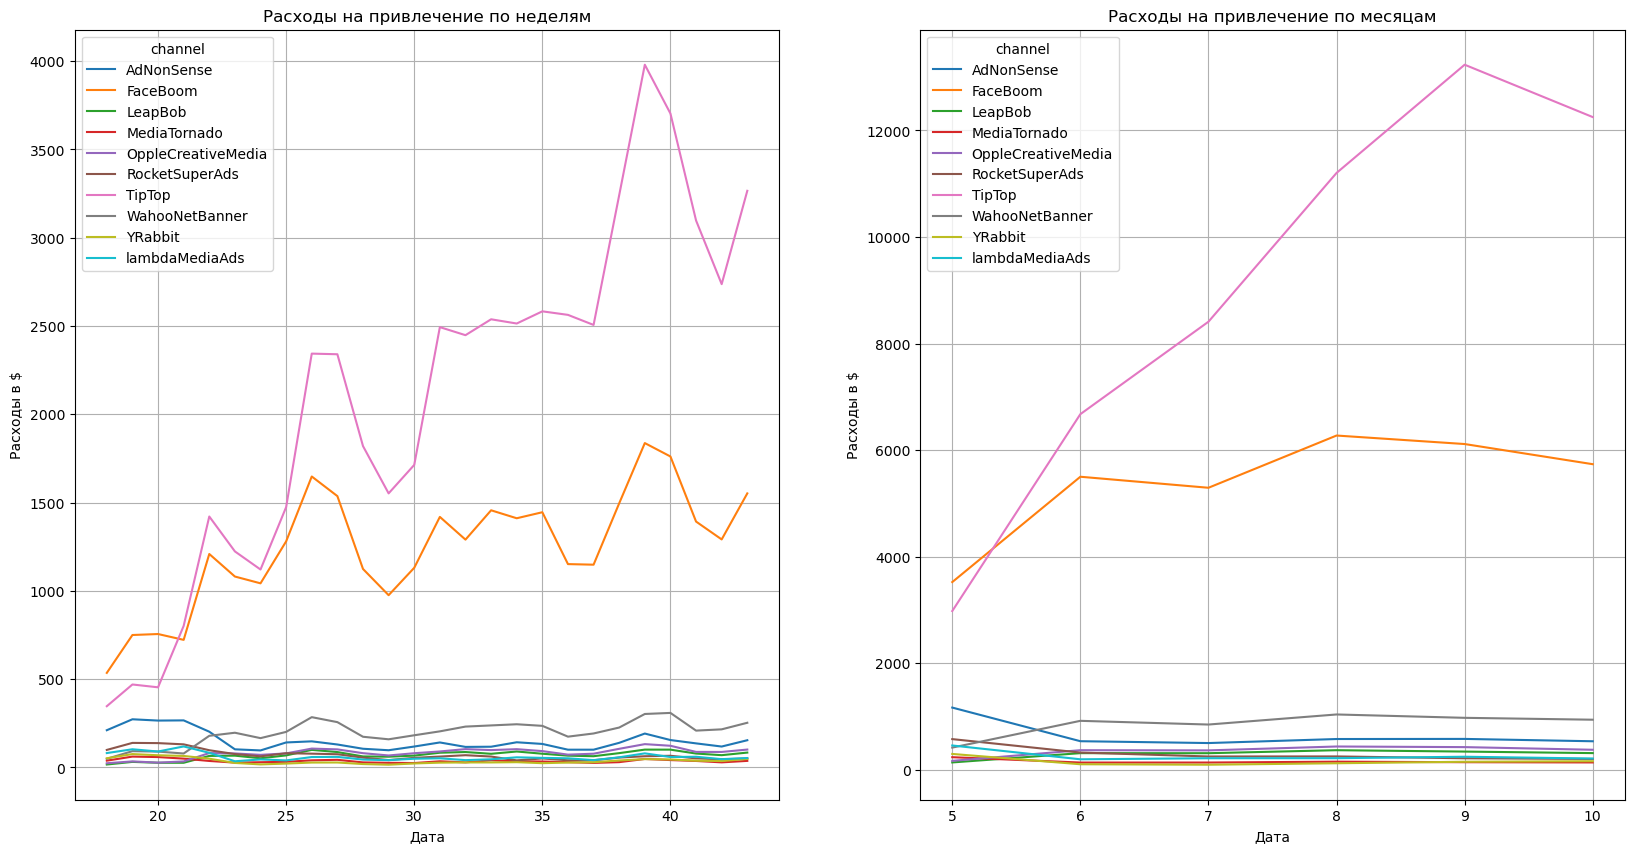

In [37]:
plt.figure(figsize=(20,10))
conversion_by_week = (costs
        .pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
        .fillna(0)
)

conversion_by_week.plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Расходы на привлечение по неделям')
plt.xlabel('Дата')
plt.ylabel('Расходы в $')

conversion_by_week = (costs
        .pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
        .fillna(0)
)

conversion_by_week.plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Расходы на привлечение по месяцам')
plt.xlabel('Дата')
plt.ylabel('Расходы в $')
plt.show()

**Вывод:**

Как видно из графиков самые высокие расходы на привлечение пользователей у каналов TipTop и FaceBoom, как по неделям так и по месяцам.

#### Стоимость привлечения пользователя
Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [38]:
cac_user = (profiles.query('channel != "organic"')
                    .groupby('channel')
                    .agg({'acquisition_cost': 'mean'})
                    .reset_index()
                    .sort_values(by='acquisition_cost', ascending=False)
                    .rename(columns={'channel':'Канал', 'acquisition_cost':'Средняя цена привлечения'})
            )
display(round(cac_user, 2))

Канал  Средняя цена привлечения
6              TipTop                      2.80
1            FaceBoom                      1.11
0          AdNonSense                      1.01
9      lambdaMediaAds                      0.72
7      WahooNetBanner                      0.60
5      RocketSuperAds                      0.41
4  OppleCreativeMedia                      0.25
8             YRabbit                      0.22
3        MediaTornado                      0.22
2             LeapBob                      0.21

**Вывод:**

Из таблицы выше видно, что дороже всего обошлись привлеченные пользователи из TipTop. Средняя стоимость их привлечения в несколько раз дороже, чем стоимость привлечения пользователей с других каналов.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

#### Окупаемость рекламы
Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [39]:
profiles = profiles.query('channel != "organic"')

Исключаем органических пользователей. Органические пользователи приходят в приложение самостоятельно, а не из рекламы, поэтому на органических пользователей расходы не считаем. 


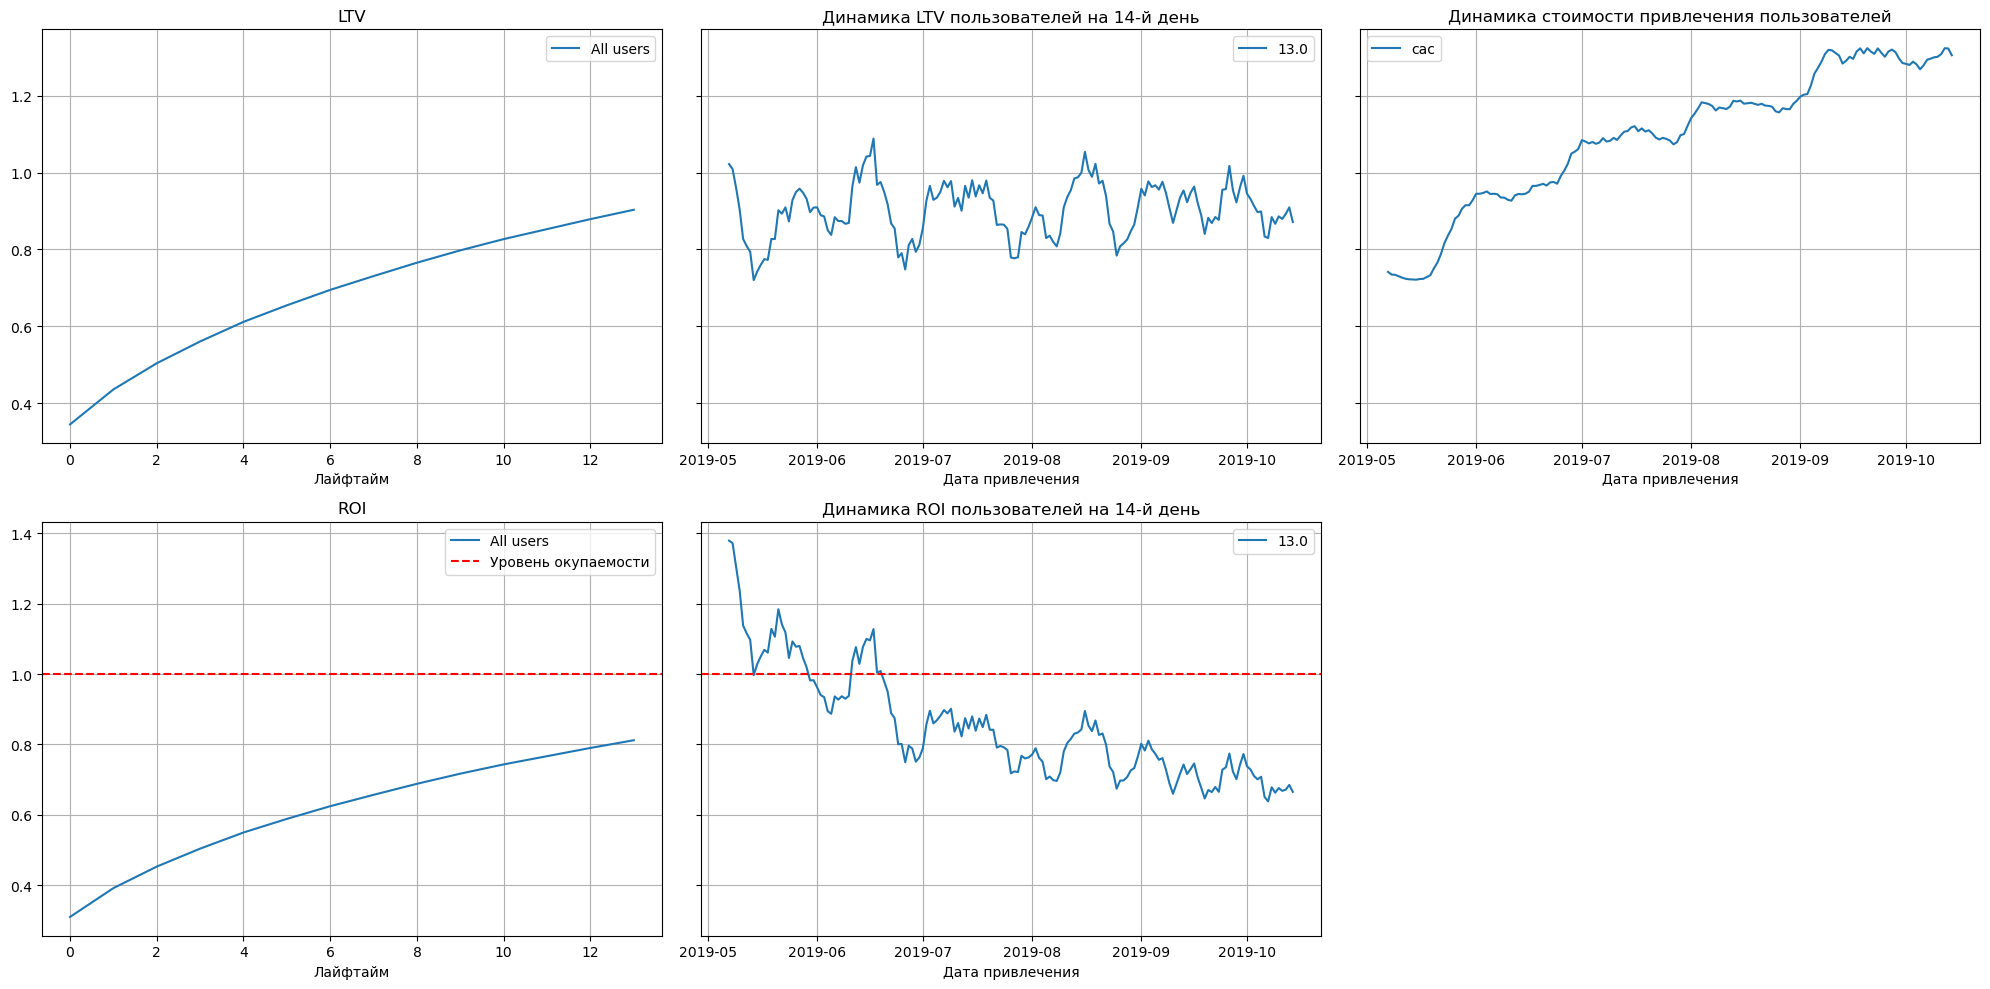

In [40]:
#считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

**Вывод:**

- Рекламный бюджет, выделенный на привлечение клиентов, продолжает расти.
- Окупаемость клиентов при приближении к 14-ому дню не достигла 1 и не привысила уровень окупаемости, следовательно, реклама не окупается.
- LTV плавно растет но не пересекает 1.
- Динамика ROI после июня 2019 года снижается, привлеченные пользователи не окупаются в 14 дневном лайфтайме.

#### Конверсия и удержание пользователей и динамика её изменения
Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построем и изучим графики конверсии и удержания.

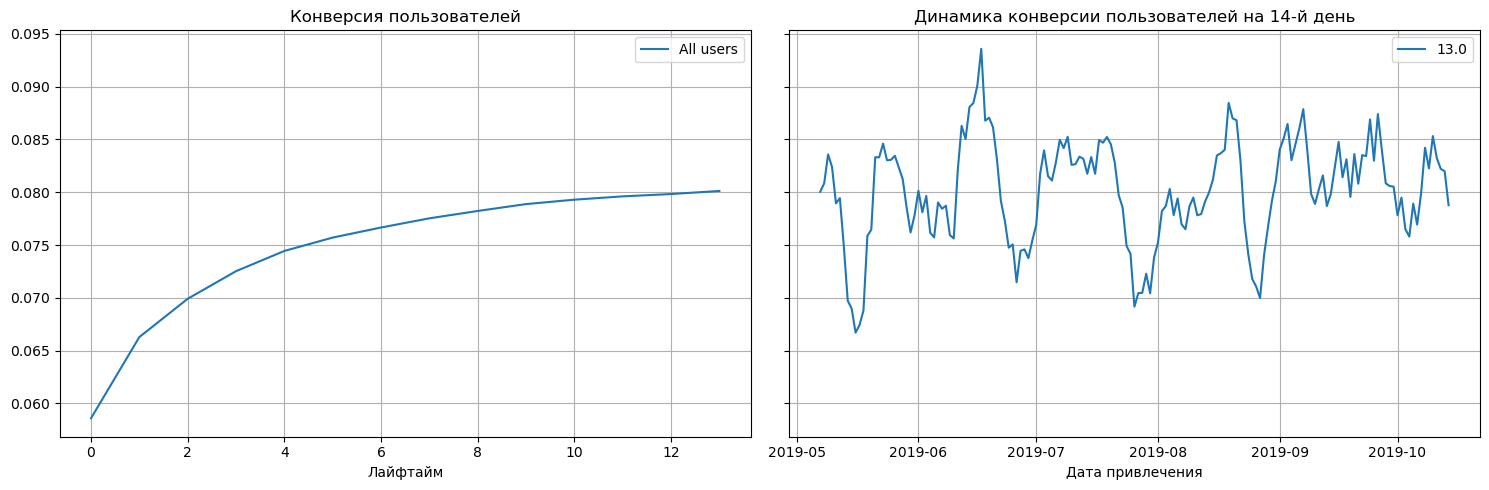

In [41]:
#Строим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Конверсия пользователей растет.

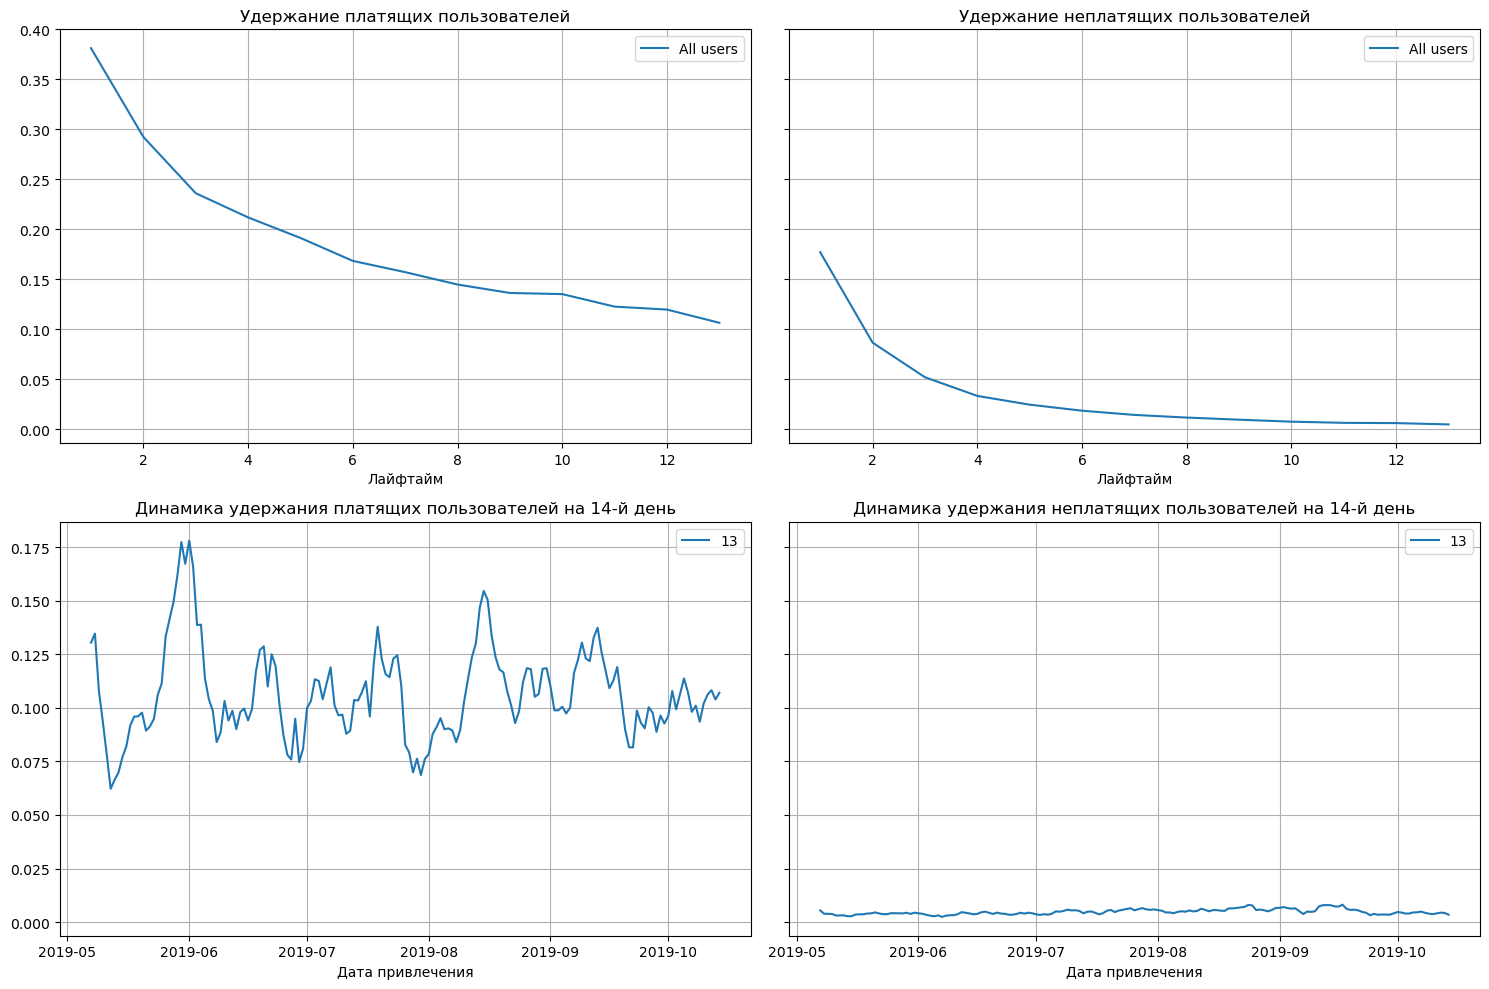

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Удержание платящих пользователей выше, чем удержание неплатящих пользователей. Проверим как обстоят дела с конверсией и удержанием по разным категориям: страны, девайсы, каналы привлечения. Примерно с 9 дня удержание неплатящих пользователей выходит на плато.

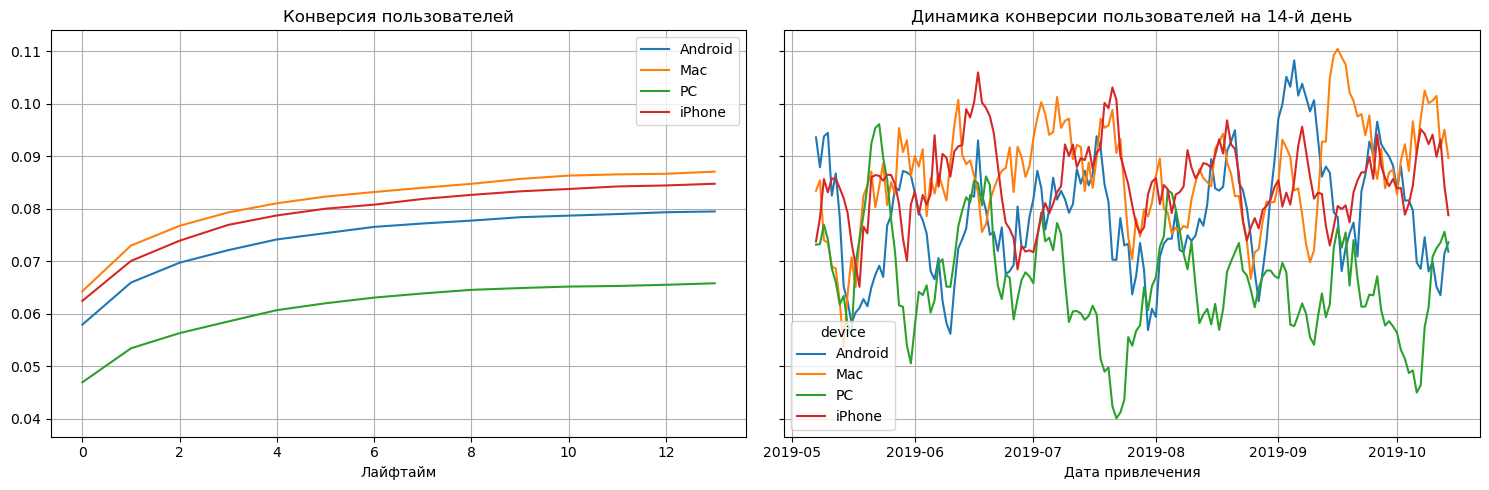

In [43]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['device'])

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

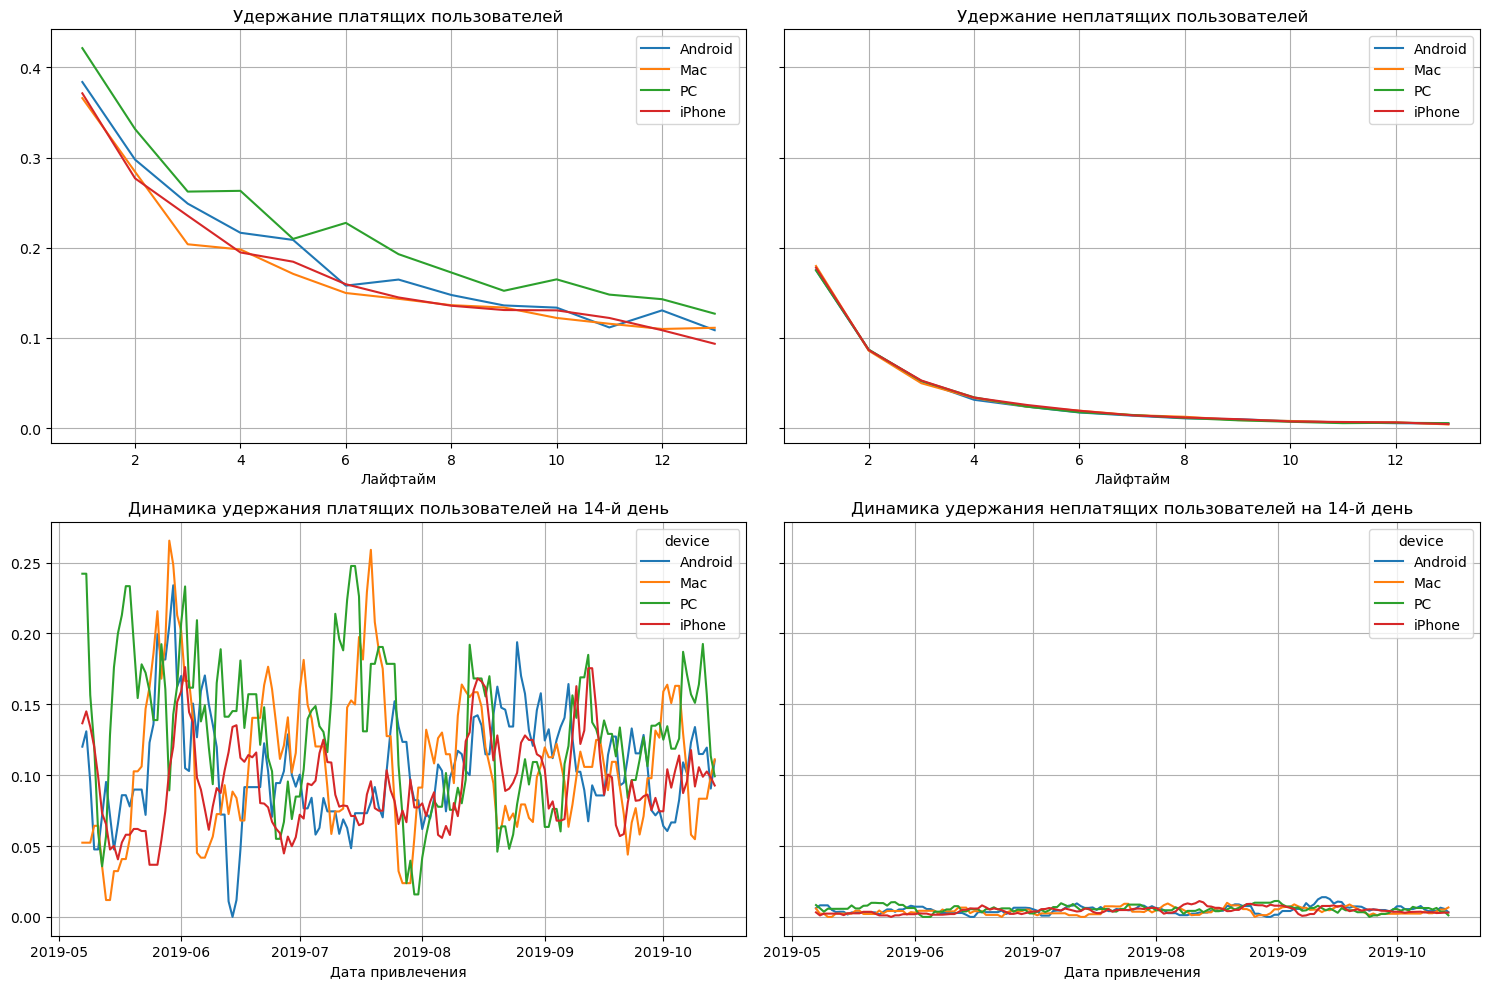

In [44]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['device'])

plot_retention(retention_grouped, retention_history, analysis_horizon)

Наименьшая конверсия у пользователей с устройством PC. При этому них наилучшее удержание.

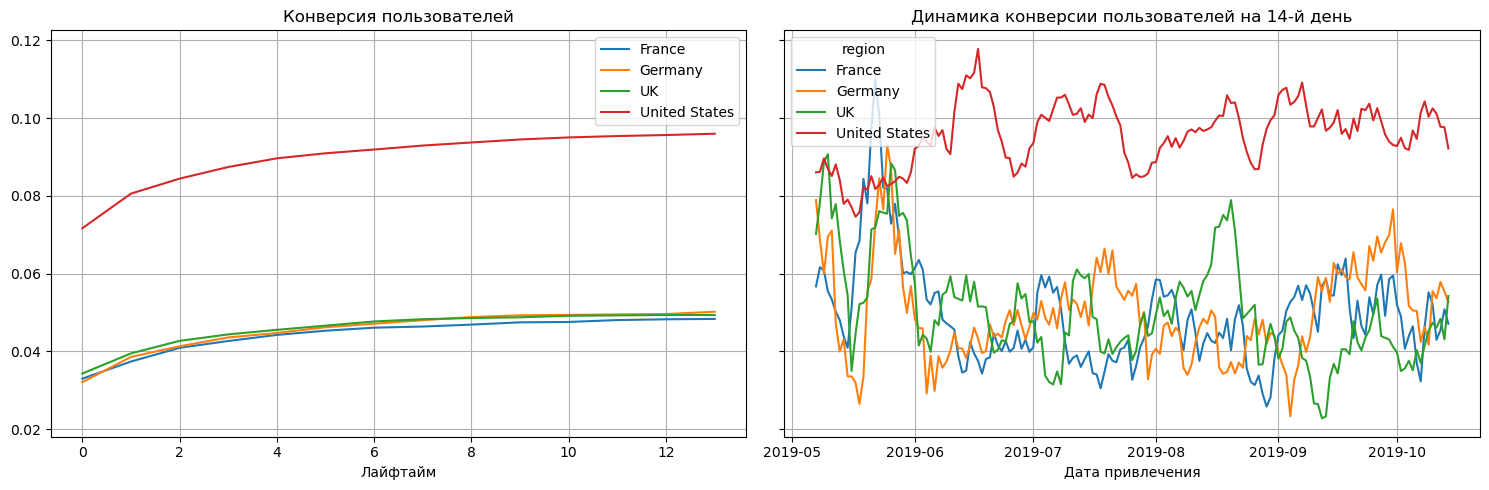

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['region'])

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

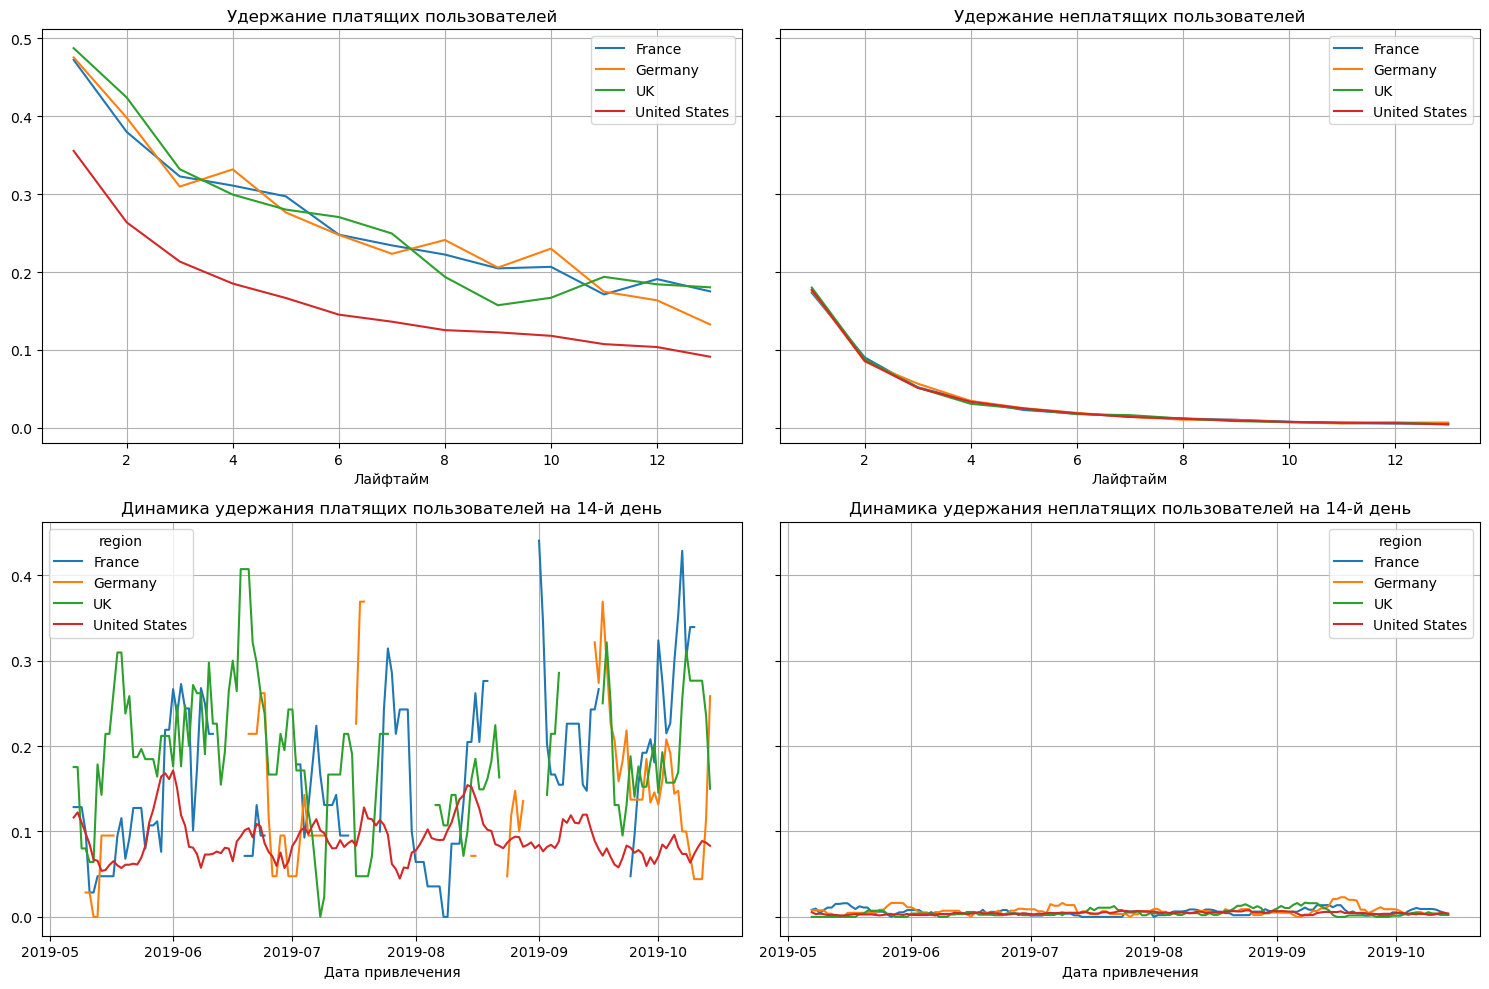

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['region'])

plot_retention(retention_grouped, retention_history, analysis_horizon)

Наиболее высокая конверсия пользователей из United States при этом у них же наихудшее удержание платящих пользователей.


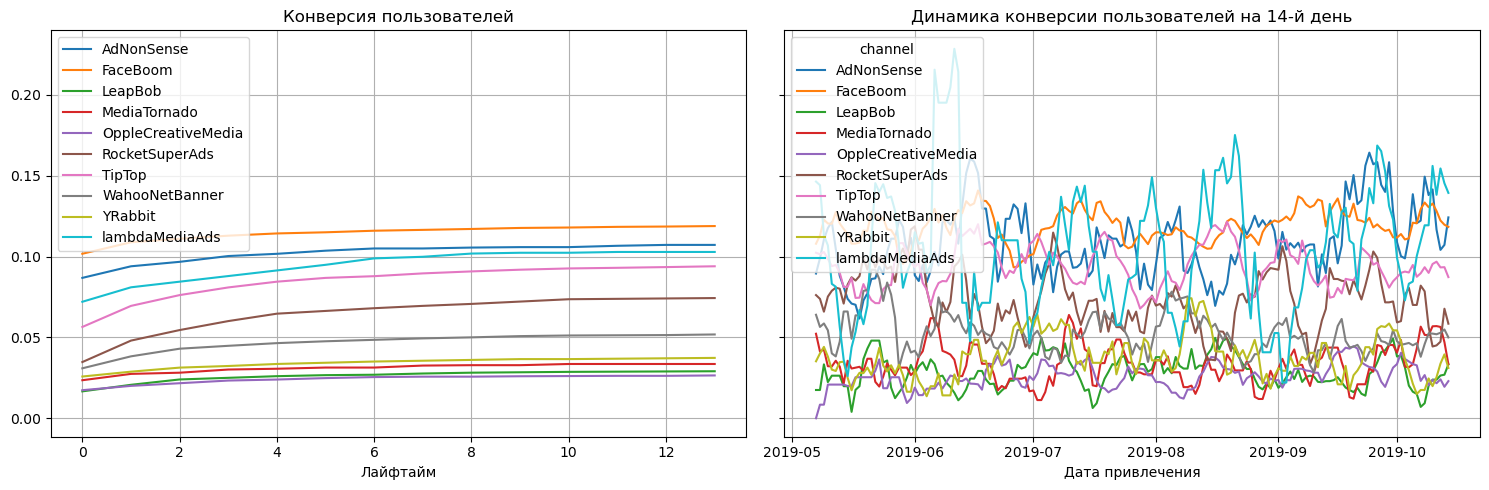

In [47]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel'])

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

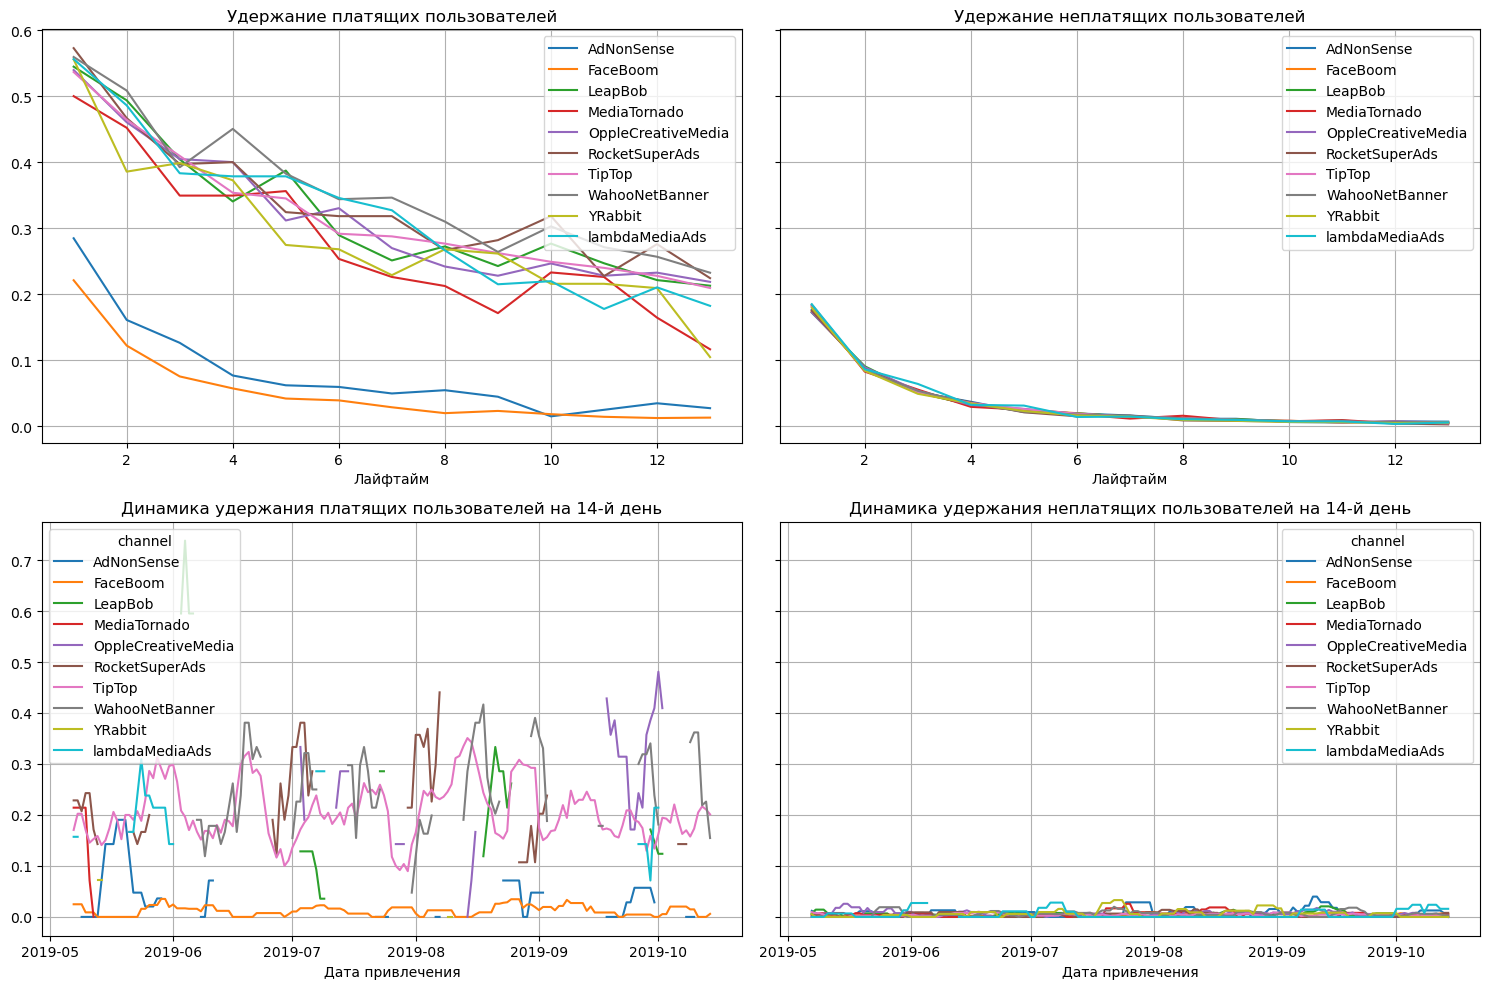

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, analysis_horizon)

Хуже всего платные пользователи удерживаются у двух каналов с высокими показателями САС: FaceBoom и AdNonSense. При этом у этих каналов высокая конверсия.

#### Окупаемость рекламы по устройствам
Проанализируем окупаемость рекламы с разбивкой по устройствам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

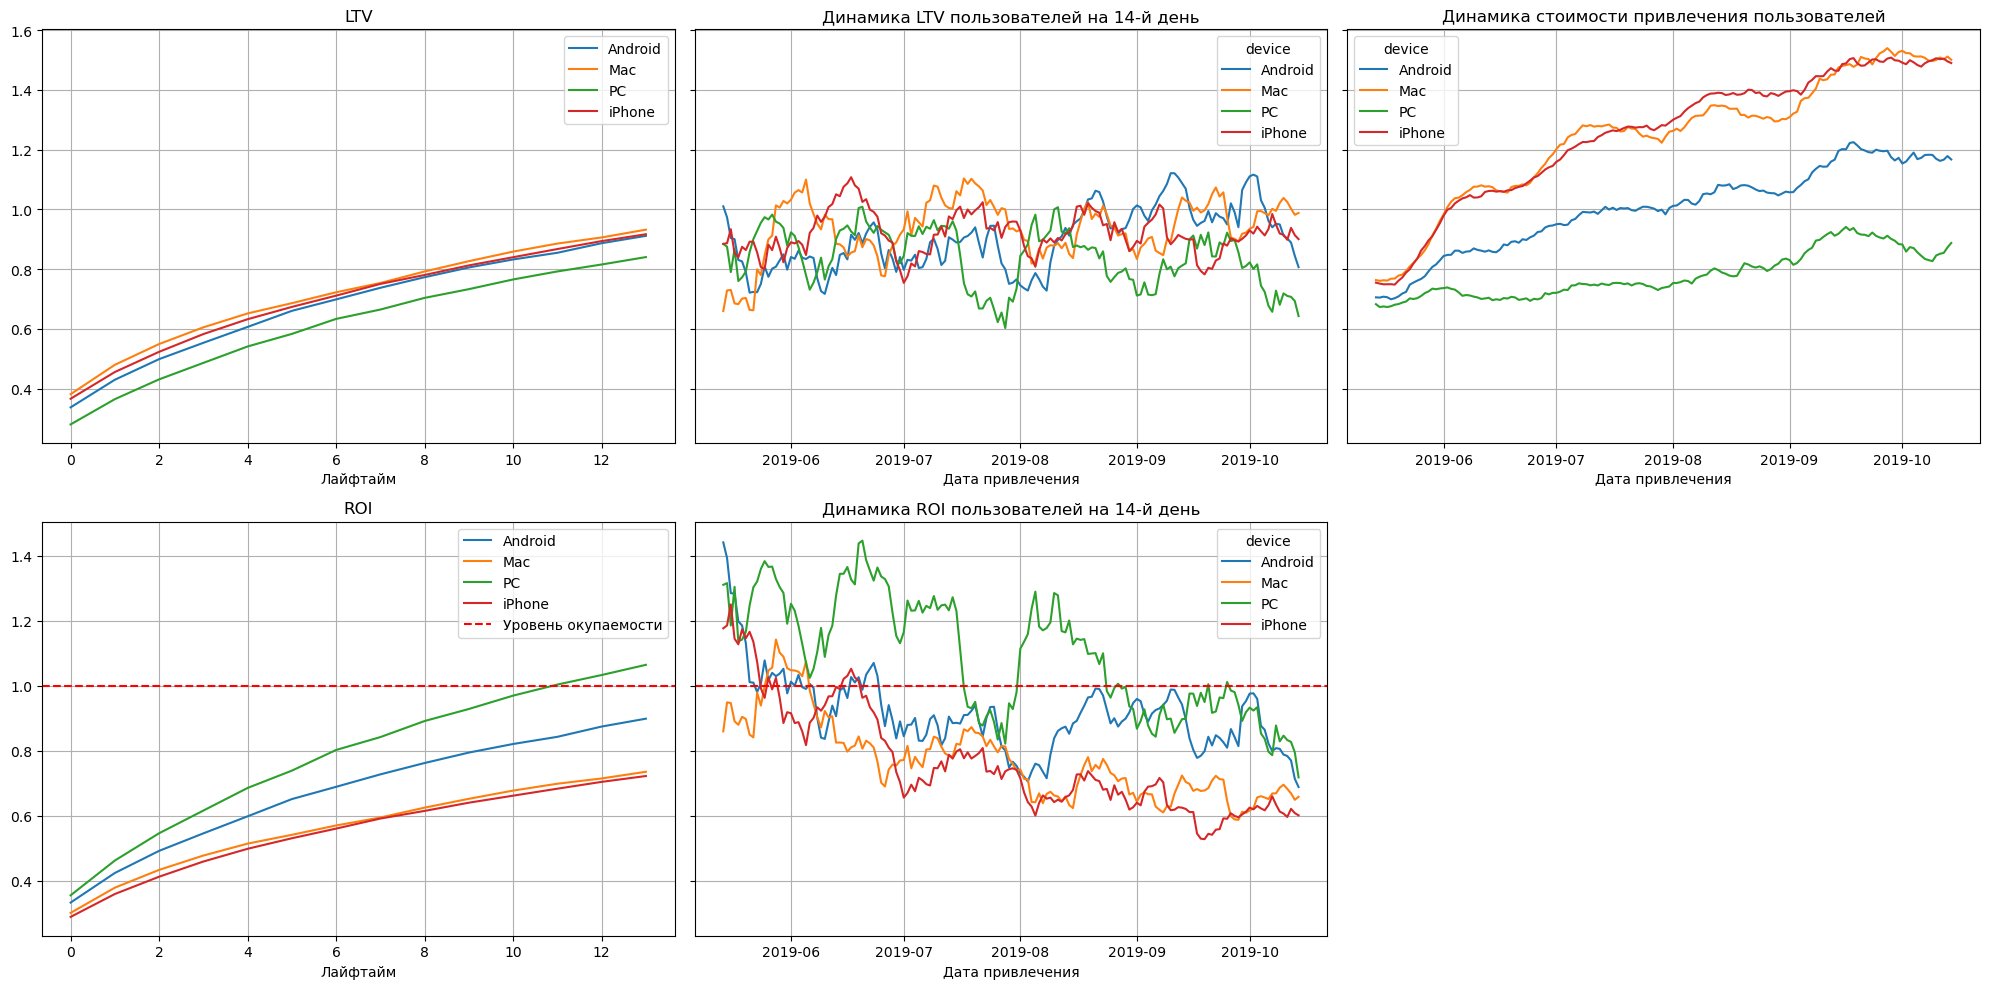

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

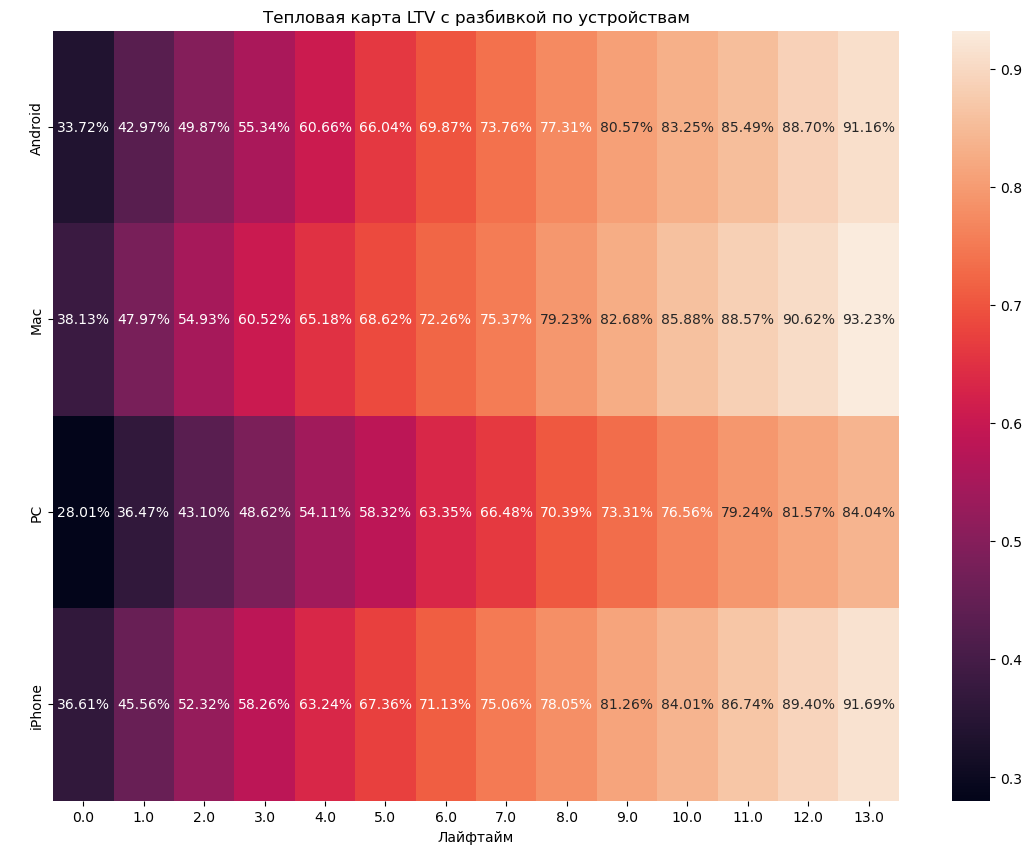

In [50]:
plt.figure(figsize=(30, 10))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.2%', 
    ax=plt.subplot(1, 2, 1)
            )
plt.title('Тепловая карта LTV с разбивкой по устройствам')
plt.xlabel('Лайфтайм')
plt.ylabel(' ')
plt.show()

**Вывод:**
- CAC по устройствам Mac и iPhone выше, чем по устройствам PC и Android.
- LTV пользователей, использующих Mac, iPhone и Android выше, чем у пользователей PC.
- Из графика ROI видно, что окупаются лишь пользователи использующие PC, при этом траты на привлечение таких пользователей являются самыми низкими. Хуже всего с окупаемостью в 14 дневном лайфтайме у пользователей Mac, iPhone.
- На графике с динамикой ROI видим, что с июня окупаемость падает у всех устройств кроме PC. Однако пользователи PC с сентября тоже перестают окупаться.

#### Окупаемость рекламы по странам
Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

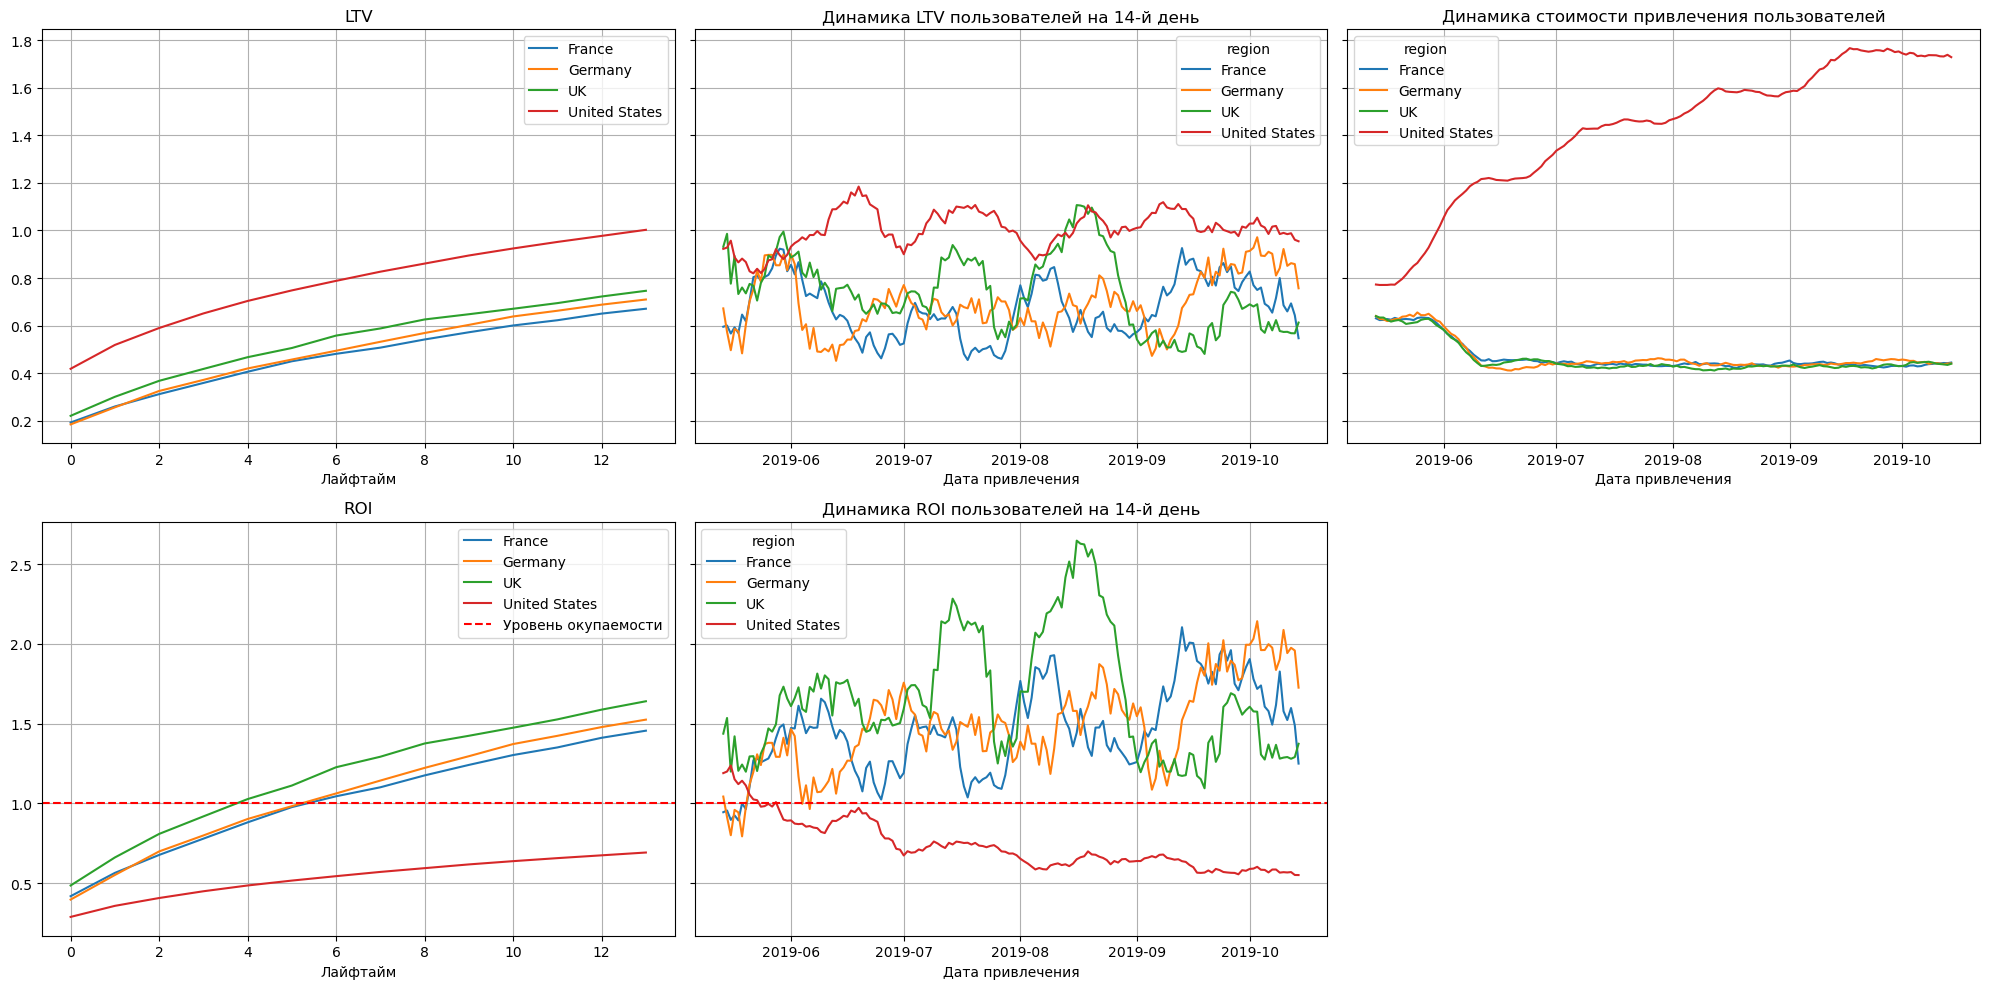

In [51]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

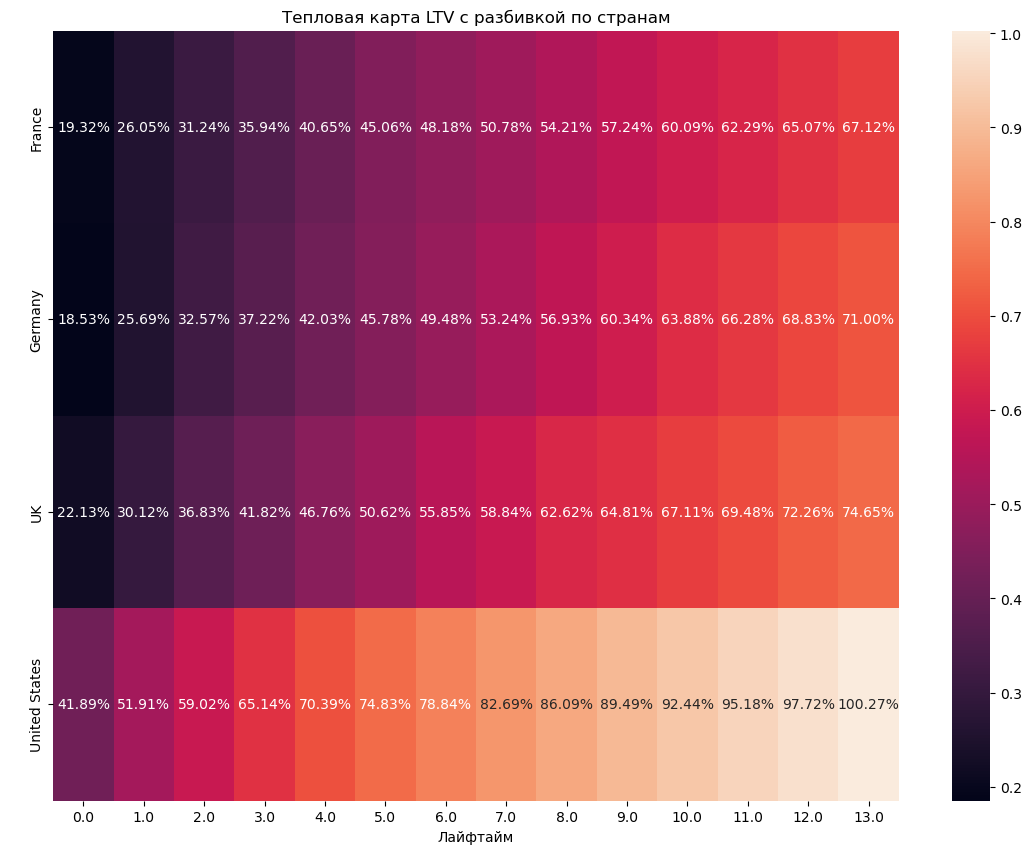

In [52]:
plt.figure(figsize=(30, 10))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.2%', 
    ax=plt.subplot(1, 2, 1)
            )
plt.title('Тепловая карта LTV с разбивкой по странам')
plt.xlabel('Лайфтайм')
plt.ylabel(' ')
plt.show()

**Вывод:**
- Как мы выяснили ранее, наиболее часть приложением пользуются пользователи из United States, LTV пользователей из этого региона является самым высоким. Динамика CAC из этого региона является самой высокой, то есть большинство средств на рекламу выделяется этому региону, так как в остальных регионах уровень CAC сначала снижался, а с середины июня вышел на плато.
- Из графика ROI видно, что не окупаются только пользователи из United States.
- При просмотре динамики ROI видим, что окупаемость пользователей из United States снижалась и начиная с июня пользоватлеи перестали окупаться. Также на графике видно, что пользователи, привлеченные из остальных регионов, продолжали окупаться. Видим также всплески ROI для клиентов из UK, окупаемость этих пользователей была самой высокой из всех.

#### Окупаемость рекламы по каналам
Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

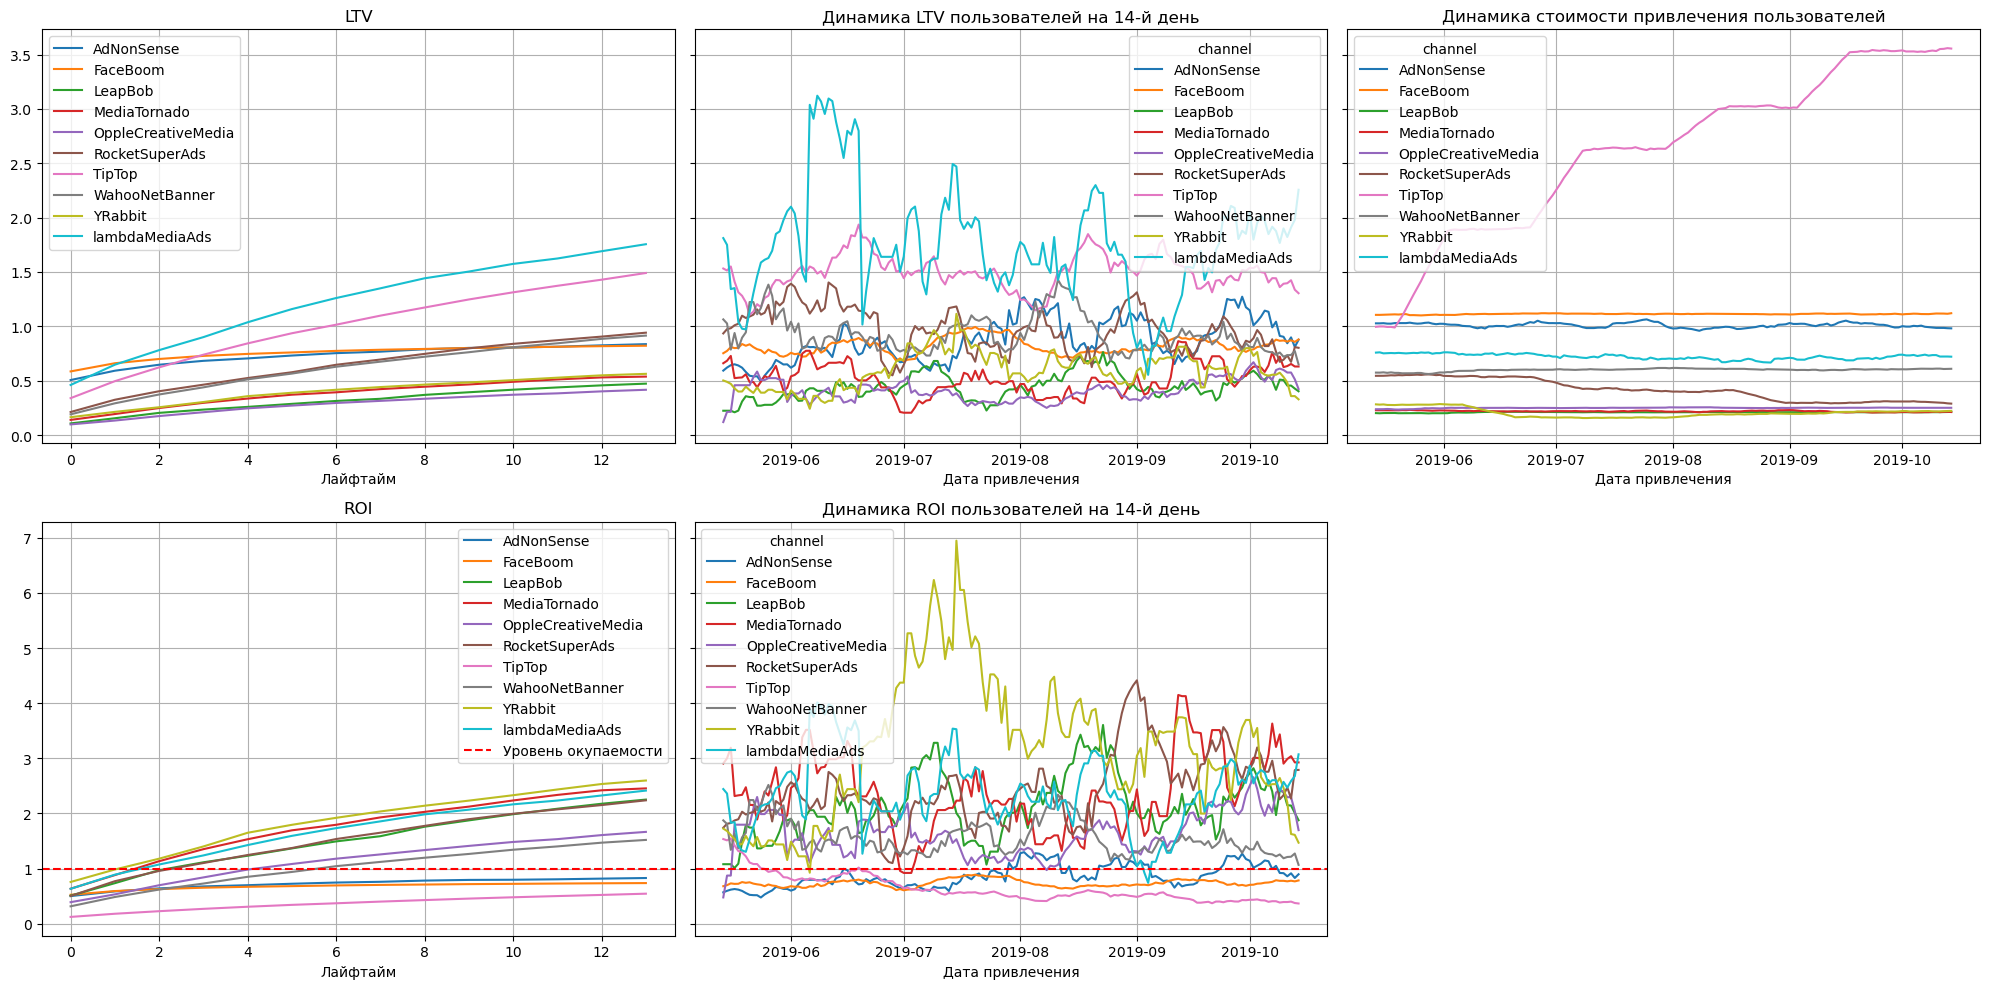

In [53]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

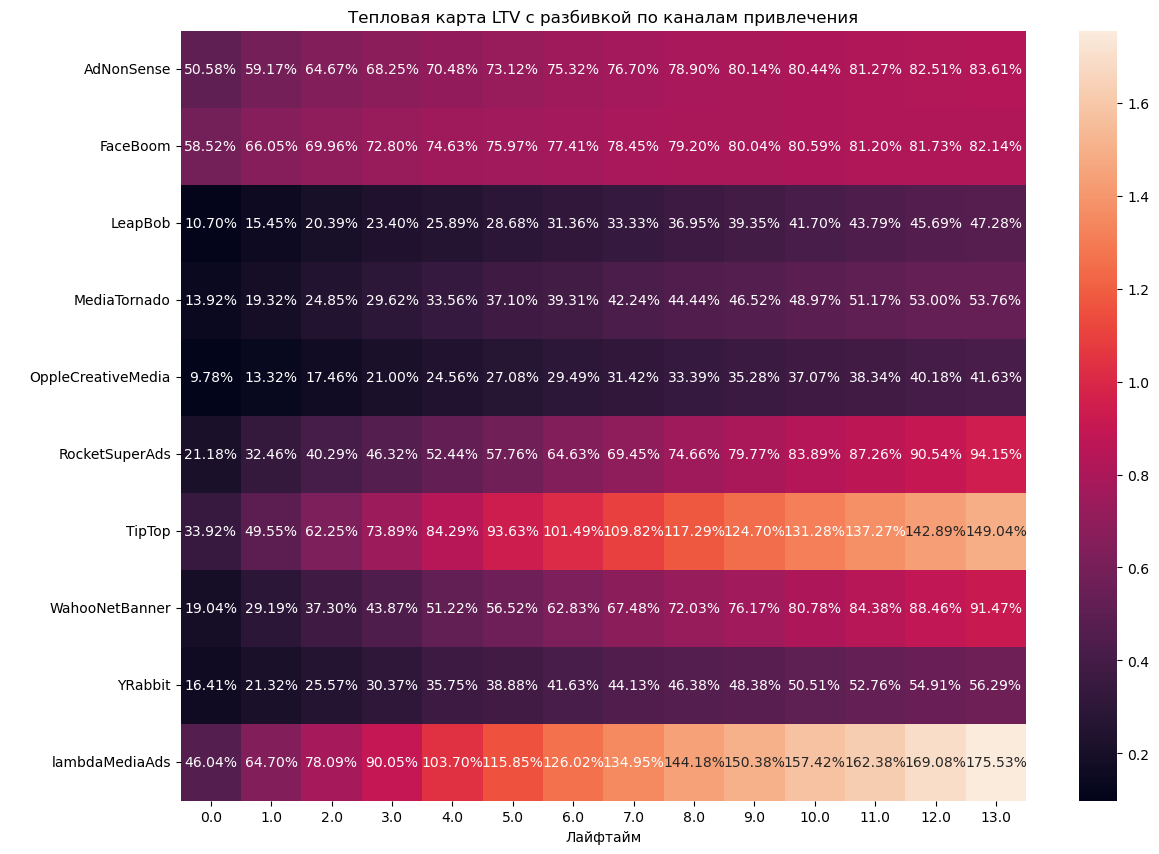

In [54]:
plt.figure(figsize=(30, 10))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.2%', 
    ax=plt.subplot(1, 2, 1)
            )
plt.title('Тепловая карта LTV с разбивкой по каналам привлечения')
plt.xlabel('Лайфтайм')
plt.ylabel(' ')
plt.show()

**Вывод:**
- Ранее мы выяснили что топ 3 канала по наивысшему САС - это TipTop, FaceBoom, AdNonSense. При этом, глядя на графики можно сделать вывод, что реклама на всех этих 3 самых популярных каналах не окупается. К 14 дню ни один из этих графиков не пересек линию окупаемости. Также если смотреть на график динамики ROI за весь период эти каналы не превысили уровень окупаемости. Только у AdNonSense были небольшие пики привышения окупаемости в начале августа, сентября и октября.
- При этом на графике с динамикой CAC видим, что бюджет для привлечения клиентов с TipTop многократно растет, по сравнению с бюджетами для привлечения пользователей с других компаний.
- Самые высокие показатели LTV у пользователей с каналов TipTop и lambdaMediaAds.
- Среди каналов выделяется lambdaMediaAds, затраты на этот канал небольшие, не высокая стоимость привлеченных клиентов, при этом высокие показатели LTV. 
- Также выделяется и YRabbit, у него хорошие показатели окупаемости на графике ROI а также на графике с динамикой ROI. Именно этот канал в районе июля - августа превысил сильнее всех окупаемость инвестиций. При этом затраты на привлечение пользователей YRabbit были одними из самых низких.

**Выводы:**

- Исходя из исследований, проведенных выше, можно сделать вывод, что реклама не окупается. 
- Наиболее высокий процент пользователей приложения из United States, при этом эти пользователи не задерживаются в приложении долго и не окупаются. То же можно сказать и про компании. Все три компании, в которые вложены больше всего бюджета на рекламы - не окупаются. 
- Больше всего не окупается канал TipTop: у него самый высокий САС, на втором месте после него канал FaceBoom. 
- Что касается устройств, наименьшая конверсия у пользователей PC, но при этом у них высокое удержание платящих клиентов. 

В данном случае проблемы окупаемости могут быть вызваны неправильным распределением рекламного бюджета. Можно перераспределить бюджет с тех каналов и регионов, где низкая окупаемость на другие каналы и регионы, в которых окупаемость выше. Возможно, в данных регионах или каналах привлечения данный продукт не пользуется популярностью и выделение средств на рекламу продукта в этих категориях  может сказываться негативно: низкая окупаемость.

### Итоговый вывод

В данной работе было проведено исследование прибыльности и окупаемости приложения Procrastinate Pro+. Компания Procrastinate Pro+ представлена в 4х регионах: United States, Germany, UK, France. Данное приложение используется на 4х устройствах: Android, iPhone, Mac, PC.  

В результате исследования было выявлено, что основной причиной неокупаемости приложения является неправильное распределение рекламного бюджета на привлечение пользователей из United States используя каналы привлечения TipTop, FaceBoom, AdNonSense:
- Во всех трех каналах высокая САС, и низкая окупаемость, ни один из этих каналов привлечения не окупился за 14 дней;
- Низкая динамика удержания платящих пользователей у FaceBoom и AdNonSense, динамика удержания платящих пользователей с канала TipTop достаточно хорошая;
- Платящие пользователи, привлеченные с каналов FaceBoom и AdNonSense плохо удерживаются;
- Удержание платящих пользователей из United States является самым низким;
- Удержание платящих пользователей, пользующихся устройствами Mac, iPhone, ниже, чем у пользователей с другими устройствами;
- Рост расходов на привлечение пользователей с канала TipTop самый высокий из всех ( почти в 3 раза), показатель CAC также самый высокий.

В данном случае можно рекомендовать следующее:
- Перераспределить рекламный бюджет: перенаправить средства на более полезные каналы привлечения пользователей, вместо каналов AdNonSense и FaceBoom. Например, хорошие показатели ROI были у каналов YRabbit и  lambdaMediaAds. CAC у данных каналов довольно низкий, при этом высокая окупаемость, также у канала lambdaMediaAds самый высокий показатель LTV;
- Определить внимание на другие регионы, кроме United States. При исследовании было выявлено, что ROI на 14 дневный лайфтайм и ROI в динамике самый высокий у пользователей из UK. Также показатель удержания платящих пользователей из этого региона был достаточно высоким, есть смысл привлекать пользователей из этого региона;
- Выяснить причину высокого САС у канала TipTop и снизить этот показатель, если возможно, либо также перенаправить бюджет на другие более выгодные каналы привлечения YRabbit и  lambdaMediaAds.
- Так как много пользователей из United States, но платежные пользователи долго не задерживаются, посмотреть, будут ли платежные пользователи из United States привлеченные по другим каналам задерживаться дольше;
- Рассмотреть вариант привлечения пользователей с устройством PC, так как у них хороший показатель удерживания платежных пользователей.